# **PRIMERA PARTE:** ANÁLISIS EXPLORATORIO


1. Importo liberías, cargo datos y preparo el Dataframe

In [3]:
#Para análisis de datos
import pandas as pd
import numpy as np
#Para visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
#Para descargar datos de Yahoo Finance
!pip install yfinance
import yfinance as yf

In [4]:
#Voy a utilizar las cotizaciones diarias de Santander y Grifols durante los años 2022 y 2023.
#También descargo el Índice al que pertenecen (Ibex35) para más tarde estudiar la correlación y valorar su utilización en la parte de Machine Learning

#Cargo los datos desde YahooFinance
Santander = 'SAN.MC'
Grifols = 'GRF.MC'
IBEX = '^IBEX'

ibex_data = yf.Ticker(IBEX)
santander_data = yf.Ticker(Santander)
grifols_data = yf.Ticker(Grifols)

start_date = '2022-01-01'
end_date = '2023-12-31'

#Me descargo la serie histórica con periodicidad diaria
ibex_df = ibex_data.history(period='1d', start=start_date, end=end_date)
santander_df = santander_data.history(period='1d', start=start_date, end=end_date)
grifols_df = grifols_data.history(period='1d', start=start_date, end=end_date)

In [5]:
#Hago un print para ver las columnas de los datasets cargados desde yahoofinance
print(ibex_df.columns)
print(santander_df.columns)
print(grifols_df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [6]:
#Al descargar los datos de YahooFinance, el daframe tiene una 'columna' que es el Índice y contiene la fecha.
#Este índice se utiliza para identificar cada fila de forma única
print(grifols_df.index)

DatetimeIndex(['2022-01-03 00:00:00+01:00', '2022-01-04 00:00:00+01:00',
               '2022-01-05 00:00:00+01:00', '2022-01-06 00:00:00+01:00',
               '2022-01-07 00:00:00+01:00', '2022-01-10 00:00:00+01:00',
               '2022-01-11 00:00:00+01:00', '2022-01-12 00:00:00+01:00',
               '2022-01-13 00:00:00+01:00', '2022-01-14 00:00:00+01:00',
               ...
               '2023-12-14 00:00:00+01:00', '2023-12-15 00:00:00+01:00',
               '2023-12-18 00:00:00+01:00', '2023-12-19 00:00:00+01:00',
               '2023-12-20 00:00:00+01:00', '2023-12-21 00:00:00+01:00',
               '2023-12-22 00:00:00+01:00', '2023-12-27 00:00:00+01:00',
               '2023-12-28 00:00:00+01:00', '2023-12-29 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/Madrid]', name='Date', length=512, freq=None)


En este caso, el Índice al ser de tipo DatetimeIndex, me permite trabajar con series temporales y poder filtrar los datos por año:

In [8]:
#Añado las columnas 'Fecha' y 'Hora', partiendo del Índice
santander_df['Date']= pd.to_datetime(santander_df.index).date
santander_df['Time']= pd.to_datetime(santander_df.index).time

grifols_df['Date']= pd.to_datetime(grifols_df.index).date
grifols_df['Time']= pd.to_datetime(grifols_df.index).time

ibex_df['Date']= pd.to_datetime(ibex_df.index).date
ibex_df['Time']= pd.to_datetime(ibex_df.index).time


In [9]:
#Como la columna 'Date' ya es independiente, la paso a formato datetime para separarla a su vez en tres y poder trabajar con el Año individualmente
santander_df['Date'] = pd.to_datetime(santander_df['Date'])
santander_df['Año'] = santander_df['Date'].dt.year
santander_df['Mes'] = santander_df['Date'].dt.month
santander_df['Día'] = santander_df['Date'].dt.day

grifols_df['Date'] = pd.to_datetime(grifols_df['Date'])
grifols_df['Año'] = grifols_df['Date'].dt.year
grifols_df['Mes'] = grifols_df['Date'].dt.month
grifols_df['Día'] = grifols_df['Date'].dt.day

ibex_df['Date'] = pd.to_datetime(ibex_df['Date'])
ibex_df['Año'] = ibex_df['Date'].dt.year
ibex_df['Mes'] = ibex_df['Date'].dt.month
ibex_df['Día'] = ibex_df['Date'].dt.day

In [10]:
print(santander_df.columns)
print(grifols_df.columns)
print(ibex_df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Date', 'Time', 'Año', 'Mes', 'Día'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Date', 'Time', 'Año', 'Mes', 'Día'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Date', 'Time', 'Año', 'Mes', 'Día'],
      dtype='object')


In [11]:
#Muestro los 3 dataframes con la información que necesito
#Primero instalo dos funciones para mostrar la información en un formato más dinámico y llamativo
from IPython.display import display, Markdown

#Me quedo con todas las filas pero solo la columna del precio de cierre y del año para poder filtrar
santander_df = santander_df.loc[:,['Close','Año']]
display(Markdown('### Santander Cotización'))
display(santander_df)

grifols_df = grifols_df.loc[:,['Close','Año']]
display(Markdown('### Grifols Cotización'))
display(grifols_df)

ibex_df = ibex_df.loc[:,['Close','Año']]
display(Markdown('### IBEX Cotización'))
display(ibex_df)

### Santander Cotización

,Close,Año
Date,,
2022-01-03 00:00:00+01:00,2.606137,2022
2022-01-04 00:00:00+01:00,2.678566,2022
2022-01-05 00:00:00+01:00,2.682982,2022
2022-01-06 00:00:00+01:00,2.725380,2022
2022-01-07 00:00:00+01:00,2.749229,2022
...,...,...
2023-12-21 00:00:00+01:00,3.635945,2023
2023-12-22 00:00:00+01:00,3.650324,2023
2023-12-27 00:00:00+01:00,3.652241,2023


### Grifols Cotización

,Close,Año
Date,,
2022-01-03 00:00:00+01:00,16.740000,2022
2022-01-04 00:00:00+01:00,16.405001,2022
2022-01-05 00:00:00+01:00,16.139999,2022
2022-01-06 00:00:00+01:00,16.495001,2022
2022-01-07 00:00:00+01:00,16.215000,2022
...,...,...
2023-12-21 00:00:00+01:00,14.345000,2023
2023-12-22 00:00:00+01:00,14.280000,2023
2023-12-27 00:00:00+01:00,14.180000,2023


### IBEX Cotización

,Close,Año
Date,,
2022-01-03 00:00:00+01:00,8761.200195,2022
2022-01-04 00:00:00+01:00,8795.799805,2022
2022-01-05 00:00:00+01:00,8790.799805,2022
2022-01-06 00:00:00+01:00,8789.900391,2022
2022-01-07 00:00:00+01:00,8751.799805,2022
...,...,...
2023-12-21 00:00:00+01:00,10104.299805,2023
2023-12-22 00:00:00+01:00,10111.900391,2023
2023-12-27 00:00:00+01:00,10121.799805,2023


2. Como segundo paso, me dedico a conocer los datos

In [13]:
#Información de tipos
print('Santander')
print(santander_df.info())
print('Grifols')
print(grifols_df.info())
print('Ibex 35')
print(ibex_df.info())

Santander
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 512 entries, 2022-01-03 00:00:00+01:00 to 2023-12-29 00:00:00+01:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   512 non-null    float64
 1   Año     512 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 10.0 KB
None
Grifols
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 512 entries, 2022-01-03 00:00:00+01:00 to 2023-12-29 00:00:00+01:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   512 non-null    float64
 1   Año     512 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 10.0 KB
None
Ibex 35
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 512 entries, 2022-01-03 00:00:00+01:00 to 2023-12-29 00:00:00+01:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   512 non-null    floa

Ahora sabemos que, los tres dataframes tienen 512 entradas que corresponden a los días que ha habido cotización bursátil empezando el 3 de enero de 2022 hasta el 29 de diciembre de 2023. Principalmente, lo que más me interesa es el data type, que además coincide en todos ellos: la columna Close (precio de cierre) es de tipo númerico con decimales (perfecto para poder hacer cálculos a continuación); y la columna Año de tipo entero (para luego poder hacer análisis temporal usando filtro por año).

In [15]:
#Utilizo la función concat para transformar los tres dataframes en uno único de cara a continuar con el análisis general de los datos
Cotizaciones = pd.concat([santander_df, grifols_df, ibex_df], axis=1) #los concateno horizontalmente
#Cambio el nombre a las columnas para identificar a que valor corresponde cada una.
#Ahora cada columna hace referencia al precio de cierre de esa acción
Cotizaciones.columns = ['Santander','Año', 'Grifols','Año', 'Ibex','Año']
#Además, al reenombrar la columnas ahora puedo borrar las columnas 'Año' duplicadas quedandome únicamente con la primera que aparece
Cotizaciones = Cotizaciones.loc[:, ~Cotizaciones.columns.duplicated()] #Es decir, selecciono todas las filas y las columnas no duplicadas (solo deja una copia de las repetidas)
display(Cotizaciones)

,Santander,Año,Grifols,Ibex
Date,,,,
2022-01-03 00:00:00+01:00,2.606137,2022,16.740000,8761.200195
2022-01-04 00:00:00+01:00,2.678566,2022,16.405001,8795.799805
2022-01-05 00:00:00+01:00,2.682982,2022,16.139999,8790.799805
2022-01-06 00:00:00+01:00,2.725380,2022,16.495001,8789.900391
2022-01-07 00:00:00+01:00,2.749229,2022,16.215000,8751.799805
...,...,...,...,...
2023-12-21 00:00:00+01:00,3.635945,2023,14.345000,10104.299805
2023-12-22 00:00:00+01:00,3.650324,2023,14.280000,10111.900391
2023-12-27 00:00:00+01:00,3.652241,2023,14.180000,10121.799805


In [16]:
#Aplico el filtro por año
filtro = (Cotizaciones['Año']==2022)
Cotizaciones_2022 = Cotizaciones[filtro]
Cotizaciones_2022 = Cotizaciones_2022.loc[:,['Santander', 'Grifols', 'Ibex']]
Cotizaciones_2022.describe()

,Santander,Grifols,Ibex
count,257.000000,257.000000,257.000000
mean,2.507592,14.238082,8258.861853
std,0.225397,3.436444,368.534271
min,2.103145,8.116000,7261.100098
25%,2.348775,10.770000,8055.600098
50%,2.483286,15.320000,8272.500000
75%,2.697556,16.730000,8511.900391
max,3.075162,19.950001,8933.599609


Respecto al año 2022: El año bursátil se compuso de 257 días. Observando la media, podemos ver que los dos valores (Santander y Grifols) y el índice (Ibex) operan en escalas distintas. Santander a precios más bajos y Grifols ligeramente superiores. Por su parte, el Ibex cotiza en puntos al ser una suma ponderada de los 35 valores más líquidos del mercado bursátil español.

En cuanto a la desviación típica, Grifols es más volátil debido a la industria a la que pertenece (farmaceutica). En esta línea, la menor distancia entre el máximo y el mínimo de Santander refuerza su estabilidad, mientras en Grifols (3,43-19,9) el rango es mucho más amplio de acuerdo con la mayor volatilidad de los precios. Por último, respecto a la mediana: en Santander (2,48) es cercana a la media, sin embargo en Grifols (15,32) dista ligeramente de la media que es inferior. Esto último, podría ser señal de la existencia de valores atípicos inferiores que sesgen la media hacia abajo (más adelante estudiaré este aspecto). Otro detalle interesante que se puede observar es la asimetría negativa que parece mostrar la distribución dado que la mediana está bastante más cerca del tercer cuartil que del primero.

array([[<Axes: title={'center': 'Santander'}>,
        <Axes: title={'center': 'Grifols'}>],
       [<Axes: title={'center': 'Ibex'}>, <Axes: >]], dtype=object)

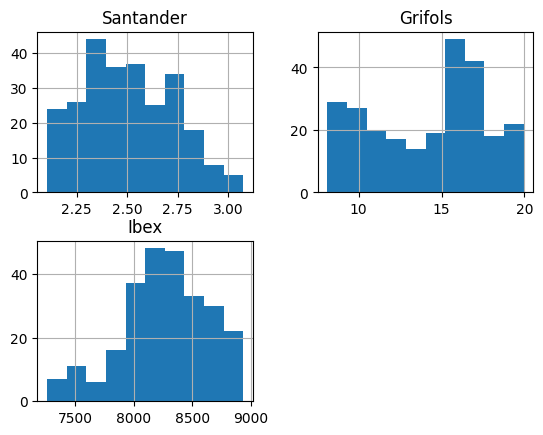

In [18]:
Cotizaciones_2022.hist()

Mirando los histogramas de la distribución de los precios de cierre en 2022 obtenemos:
- Santander: parece tener una distribución sesgada hacia la derecha (asimetría positiva)
- Grifols: distribución bimodal (dos picos, uno entorno al 10-12 y el otro al 16-18), más dispersión de los datos
- Ibex: la disribución está sesgada a la izquierda (asimetría negativa)

In [20]:
filtro2 = (Cotizaciones['Año']==2023)
Cotizaciones_2023 = Cotizaciones[filtro2]
Cotizaciones_2023 = Cotizaciones_2023.loc[:,['Santander', 'Grifols', 'Ibex']]
Cotizaciones_2023.describe()

,Santander,Grifols,Ibex
count,255.000000,255.000000,255.000000
mean,3.225435,11.888184,9347.057629
std,0.243564,1.493981,341.219073
min,2.621308,8.412000,8369.700195
25%,3.013114,11.200000,9172.550293
50%,3.241793,12.125000,9314.400391
75%,3.370519,12.977500,9465.149902
max,3.792675,15.455000,10258.099609


Respecto al año 2023: los días bursátiles fueron algunos menos, 255 días. No osbtante, en cuanto al resto del análisis, la interpretación se mantiene en la misma línea que el realizado para el ejercicio 2022. Destacando, una menor volatilidad en Grifols y una mayor concentración de los datos.

array([[<Axes: title={'center': 'Santander'}>,
        <Axes: title={'center': 'Grifols'}>],
       [<Axes: title={'center': 'Ibex'}>, <Axes: >]], dtype=object)

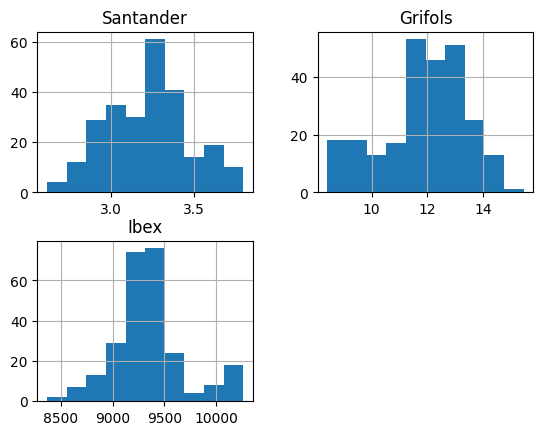

In [22]:
Cotizaciones_2023.hist()

Mirando los histogramas de la distribución de los precios de cierre en 2023 obtenemos:
- Santander: el rango de precios es superior a 2022 y con una mayor concentración.
- Grifols: se observa como la volatilidad ha disminuido, aunque sigue pareciendo una bimodal.
- Ibex: La disribución se asemeja más a una Normal, con un rango también superior que podría ser señal de recuperación del mercado dado que los otros dos valores (Santander y Grifols) también muestran una mejora en el desempeño.  

3. Cálculo de Rendimientos

In [25]:
#Para saber si hay nulos a la hora de calcular el rendimiento
print(Cotizaciones.isnull().sum())

Santander    0
Año          0
Grifols      0
Ibex         0
dtype: int64


In [26]:
#En primer lugar, calculo el rendimiento real para los tres activos
#Defino una función para el cáculo del rendimiento real agrupando por año
def rendimiento_real(Cotizaciones, Activo):
  rendimiento_real_año = Cotizaciones.groupby('Año').apply(
      lambda x: (x[Activo].iloc[-1] - x[Activo].iloc[0])/x[Activo].iloc[0]*100)
  return rendimiento_real_año.round(1)

rend_real_SAN = rendimiento_real(Cotizaciones, 'Santander')
rend_real_GRF = rendimiento_real(Cotizaciones, 'Grifols')
rend_real_IBX = rendimiento_real(Cotizaciones, 'Ibex')

C:\Users\usuario\AppData\Local\Temp\ipykernel_9160\2375111955.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rendimiento_real_año = Cotizaciones.groupby('Año').apply(
C:\Users\usuario\AppData\Local\Temp\ipykernel_9160\2375111955.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rendimiento_real_año = Cotizaciones.groupby('Año').apply(
C:\Users\usuario\AppData\Local\Temp\ipykernel_9160\2375111955.py:4

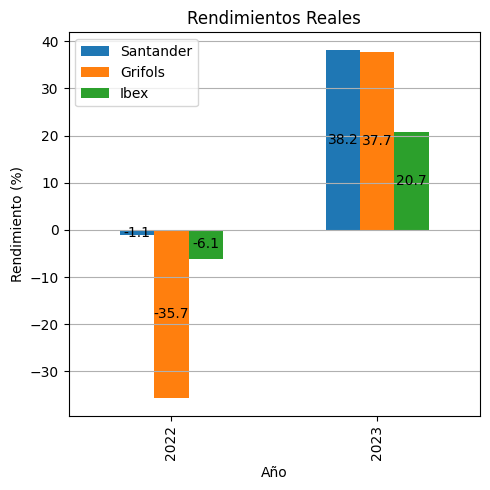

In [27]:
#Creo un gráfico para mostrar los rendimientos reales
#Primero, agrupo en un único dataframe
Gráfico_Rendimientos = pd.DataFrame({
    'Santander': rend_real_SAN,
    'Grifols': rend_real_GRF,
    'Ibex': rend_real_IBX}).reset_index()

Gráfico_Rendimientos.set_index('Año', inplace=True)

#Gráfico (previamente instalada la libreria matplotlib.pylot)
Graph = Gráfico_Rendimientos.plot(kind='bar', figsize=(5,5))
#Le meto etiquetas de datos en las barras
for contenedor in Graph.containers:
  Graph.bar_label(contenedor, label_type='center')

plt.title('Rendimientos Reales')
plt.ylabel('Rendimiento (%)')
plt.xlabel('Año')
plt.legend
plt.grid(axis='y')
plt.tight_layout() #evitar que se solapen elementos en el gráfico
plt.show()

In [28]:
#Ahora, calculo el rendimiento medio diario
#Empiezo por el rendimiento diario
def rendimiento_diario(Cotizaciones, Activo):
  rendimiento_diario = Cotizaciones.groupby('Año')[Activo].pct_change()
  return rendimiento_diario.round(5)

Cotizaciones['Rendimiento Diario SAN'] = rendimiento_diario(Cotizaciones, 'Santander')
Cotizaciones['Rendimiento Diario GRF'] = rendimiento_diario(Cotizaciones, 'Grifols')
Cotizaciones['Rendimiento Diario IBX'] = rendimiento_diario(Cotizaciones, 'Ibex')

#Promedio el rendimiento diario
rend_diario_SAN = Cotizaciones.groupby('Año')['Rendimiento Diario SAN'].mean()
rend_diario_GRF = Cotizaciones.groupby('Año')['Rendimiento Diario GRF'].mean()
rend_diario_IBX = Cotizaciones.groupby('Año')['Rendimiento Diario IBX'].mean()

#Lo anualizo
def rendimiento_medio_anualizado(rend_diario, dias=252):
  rendimiento_medio_anualizado = ((1+rend_diario) ** dias - 1) * 100
  return rendimiento_medio_anualizado.round(1)

rend_anual_SAN = rendimiento_medio_anualizado(rend_diario_SAN, dias=252)
rend_anual_GRF = rendimiento_medio_anualizado(rend_diario_GRF, dias=252)
rend_anual_IBX = rendimiento_medio_anualizado(rend_diario_IBX, dias=252)

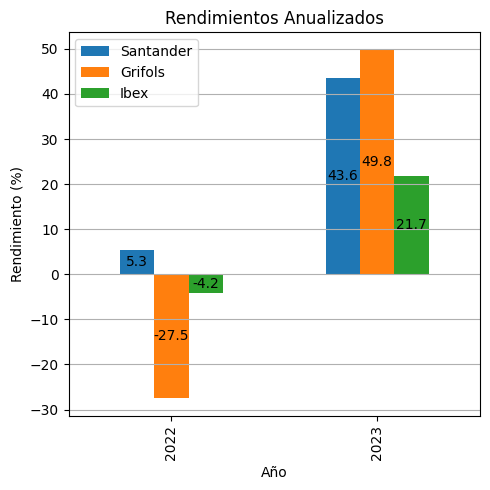

In [29]:
Gráfico_RendimientosAnual = pd.DataFrame({
    'Santander': rend_anual_SAN,
    'Grifols': rend_anual_GRF,
    'Ibex': rend_anual_IBX}).reset_index()

Gráfico_RendimientosAnual.set_index('Año', inplace=True)

#Gráfico (previamente instalada la libreria matplotlib.pylot)
Graph2 = Gráfico_RendimientosAnual.plot(kind='bar', figsize=(5,5))
#Le meto etiquetas de datos en las barras
for contenedor in Graph2.containers:
  Graph2.bar_label(contenedor, label_type='center')

plt.title('Rendimientos Anualizados')
plt.ylabel('Rendimiento (%)')
plt.xlabel('Año')
plt.legend
plt.grid(axis='y')
plt.tight_layout() #evitar que se solapen elementos en el gráfico
plt.show()

En esta tercera parte del proyecto, he querido calcular el rendimiento de los tres activos siguiendo dos tipos de métricas financieras. En primer lugar, el rendimiento real, que mide la variación porcentual entre el precio de cierre inicial y el precio de cierre final del valor de cada año. Por otra parte, la segunda métrica, el rendimiento anualizado tiene en cuenta todas las variaciones diarias promediandolas y mostrando el efecto compuesto a lo largo del año.

En este sentido, se observa que con el cálculo de los rendimientos anualizados la magnitud del rendimiento negativo se suaviza mientras el rendimiento positivo, al reinvertirse en si mismo de manera compuesta, se intensifica.

Es por ello, que los outliers negativos* presentes en la distribución de Grifols podrían tener un efecto mayor en el rendimiento real que en el anualizado al promediar el rendimiento y asumir un crecimiento constante. Se podría ver como en 2022 el rend.real de Grifols pasa de -35,7 a -27,5 como rend.anualizado, y en 2023 de 37,7 a 49,8. Sin embargo, en Santander, que es un activo con menor volatilidad el calculo anualizado tiende a estar mas cercano al calculo real.

*outliers negativos = valores atípicamente inferiores

4. Estudio de Outliers

Como hemos analizando más arriba, en la distribución de Grifols, la media está por debajo de la mediana a cierta distancia. Lo que podría sugerir la existencia de precios de cierre puntualmente bajos responsables de sesgar la media hacia abajo. Sin embargo, en el año 2022, la elevada volatilidad también podría sugerir una mayor frecuencia de días en los que la cotización cayó más notablemente (ya no siendo puntuales).  

Por ello, voy a analizar la distribución de ambos años en busca de concluir la existencia de valores atípicos en ambos años, en ninguno, o en uno de los dos.

In [33]:
Cotizaciones_2022.Grifols.skew()
Cotizaciones_2023.Grifols.skew()
print(f'El coeficiente de asimetría de Grifols es {Cotizaciones_2022.Grifols.skew().round(2)} en 2022.')
print(f'Y {Cotizaciones_2023.Grifols.skew().round(2)} en 2023')

El coeficiente de asimetría de Grifols es -0.25 en 2022.
Y -0.48 en 2023


In [34]:
Cotizaciones_2022.Grifols.kurtosis()
Cotizaciones_2023.Grifols.kurtosis()
print(f'El coeficiente de curtosis de Grifols es {Cotizaciones_2022.Grifols.kurtosis().round(2)}')
print(f'Y {Cotizaciones_2023.Grifols.kurtosis().round(2)} en 2023')

El coeficiente de curtosis de Grifols es -1.16
Y -0.42 en 2023


Conclusiones: En ambos años persiste la asimetria negativa, esto quiere decir que la media<mediana y que nos tendremos que preocupar por outliers a la izquierda (hacia los valores bajos). Por otro lado, en cuanto a la curtosis, los valores negativos indican que los valores extremos negativos no tienen tanto peso como cabria esperar en una distribución normal.  

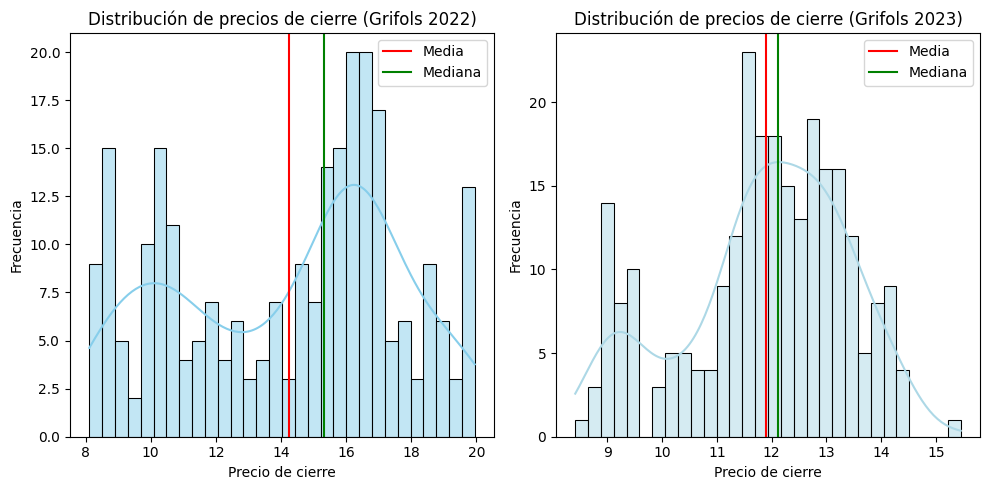

In [36]:
#Para hacer una figura con los dos gráficos juntos
fig, axes = plt.subplots(1,2, figsize=(10,5))

#Gráfico 1 = 2022
sns.histplot(Cotizaciones_2022['Grifols'], bins=30, kde=True, color='skyblue', edgecolor='black', ax=axes[0])#Añado la curva de densidad (KDE)
axes[0].axvline(Cotizaciones_2022.Grifols.mean(), color='red', label='Media')
axes[0].axvline(Cotizaciones_2022.Grifols.median(), color='green', label = 'Mediana')
axes[0].set_title('Distribución de precios de cierre (Grifols 2022)')
axes[0].set_xlabel('Precio de cierre')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

#Gráfico 2 = 2023
sns.histplot(Cotizaciones_2023['Grifols'], bins=30, kde=True, color='lightblue', edgecolor='black', ax=axes[1])
axes[1].axvline(Cotizaciones_2023.Grifols.mean(), color='red', label='Media')
axes[1].axvline(Cotizaciones_2023.Grifols.median(), color='green', label = 'Mediana')
axes[1].set_title('Distribución de precios de cierre (Grifols 2023)')
axes[1].set_xlabel('Precio de cierre')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()
plt.tight_layout()
plt.show()

Análisis de los histogramas (ambos distribución bimodal, sesgada a la izquierda):

En primer lugar, la volatilidad fue superior en 2022 (3.43 vs 1.49 en 2023) mostrando un gráfico con más picos y un rango de precios más amplio (8-20) que en 2023, donde la distribución se observa más compacta. La mayor volatilidad en 2022, se reflejó no solo en un rango más amplio sino también en mayores frecuencias de precios de cierre inferiores. Es por ello, que viendo el histograma ahora se podría esperar menos la existencia de algún valor extremadamente bajo como reponsable de tirar de la media hacia abajo, y explicarlo por un mayor numero de dias en los que la cotización cayó, haciendo que la media fuera menor.

Sin embargo, aun siendo muy parecida la distribución en 2023, es decir, los precios tienden a concentrarse en el lado superior pero con caídas ocasionales, podemos obtener conclusiones diferentes. En este caso, en los dos extremos se ven dos precios de cierre que se repitieron muy poco. El que está cercano a 8 tendría mas sentido en tanto en cuanto cuadraría con el hecho de que la media esté sesgada hacia abajo. No osbtante, el cercano a 15 visualmente podría dar más impresión de outlier por estar más alejado del conjunto de datos.  

En este sentido, los precios deberán ser analizados con más detalle utilizando los boxplots basados en la mediana y los cuartiles:



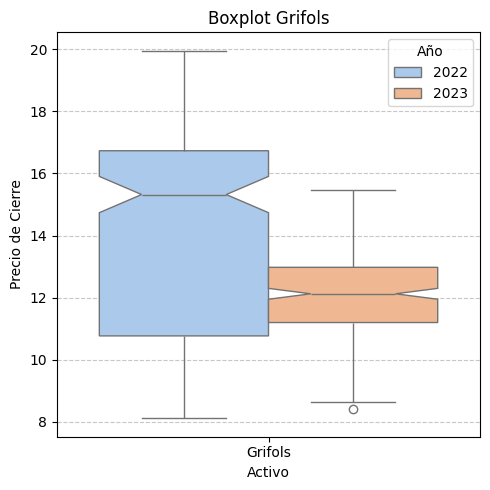

In [38]:
#Hago un Boxplot para visualizar los valores extremos
#En primer lugar, paso a formato largo mi dataframe original Cotizaciones para poder visualizar los datos en el Boxplot
Cotizaciones_Flargo = Cotizaciones.melt(id_vars='Año', #columna que se mantiene igual
                                       value_vars=['Grifols'], #columna que voy a pasar a formato largo convirtiendola en dos
                                       var_name='Activo', #nombre de la columna nueva que he creado en formato largo que se rellena con 'Grifols'
                                       value_name='Precio Cierre') #nombre de la columna nueva que contiene los precios de cierre de Grifols

#Creo el Boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(data=Cotizaciones_Flargo, x='Activo', y='Precio Cierre', hue='Año', notch=True, palette = 'pastel')
plt.title("Boxplot Grifols")
plt.xlabel("Activo")
plt.ylabel("Precio de Cierre")
plt.legend(title="Año")
plt.grid(axis="y", linestyle="--", alpha = 0.7)
plt.tight_layout()
plt.show()

Gracias a la representación del Boxplot, concluyo que las suposiciones planteadas en el apartado anterior son correctas. Únicamente encontrando un valor atípico en el lado izquierdo de la distribución de los precios de cierre de Grifols en 2023. No obstante, haciendo el cálculo númerico se obtiene que  
8,4 (valor mínimo) <  8,45 = Q1 - 1,5(Q3-Q1) y que 15,45 (valor max) < 15,62=Q3 + 1,5(Q3-Q1). Por lo tanto, el precio que veiamos en la derecha del histograma (15,45) no se considera outlier pues debería haber sido superior al límite, pero dada su cercanía no ha sido de extrañar haberlo planteado como tal.

Por último, atendiendo a las características del Boxplot se puede corroborar todo lo que se ha ido comentado a lo largo del ejercicio de análisis: en 2022, la volatilidad fue mayor, la caja es mucho más grande indicando más dispersión en los precios de cierre. En el año 2023, además de haber habido más estabilidad, los precios de cierre fueron en promedio más bajos (mediana en el 12,1 versus 15,3 en 2022). Y, por último, basandonos en los notches de ambos boxplots vemos que las medianas no se superponen lo que indica que son significativamente diferentes. Y, por ende, podría concluir que las condiciones del mercado cambiaron entre 2022 (más volatilidad) y 2023 (más estabilidad)

In [40]:
display(Cotizaciones_Flargo)

,Año,Activo,Precio Cierre
0,2022,Grifols,16.740000
1,2022,Grifols,16.405001
2,2022,Grifols,16.139999
3,2022,Grifols,16.495001
4,2022,Grifols,16.215000
...,...,...,...
507,2023,Grifols,14.345000
508,2023,Grifols,14.280000
509,2023,Grifols,14.180000
510,2023,Grifols,14.230000


# **SEGUNDA PARTE**: MACHINE LEARNING


1. Estudio la correlación entre variables para seleccionar la más adecuada como variable objetivo a predecir

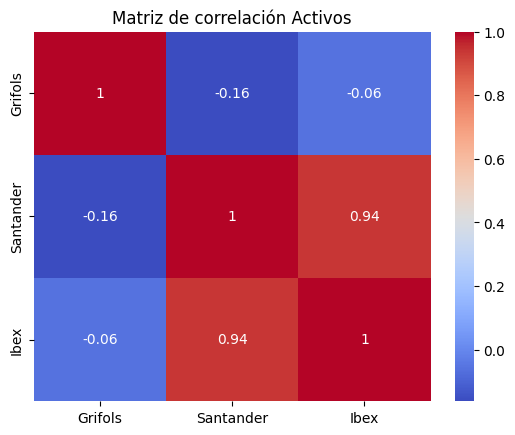

In [43]:
Cotizaciones_SGI = Cotizaciones[['Grifols', 'Santander', 'Ibex']]#Me quedo solo con las columnas de precio de cierre de los 3 Activos
correlation_matrix = Cotizaciones_SGI.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación Activos")
plt.show()

Se concluye que Santander y el Ibex tienen una correlación muy fuerte (0,94), lo que quiere decir que ambos activos tienden a moverse de manera muy similar. Lo cual tiene sentido pues Santander es de los activos que mayor peso tienen dentro del Índice.

Por lo tanto, voy a usar el Ibex como predictor para Santander.  

**Aprendizaje Supervisado: Modelo de regresión lineal para predecir los precios de cierre de Santander 2023**

0. Para ello antes debo transformar el dataframe y prepararlo para que sea más fácil utilizarlo


In [46]:
#En primer lugar, como cada año bursátil es diferente, para homogeneizar y tener columnas con los mismos registros, voy a extraer las fechas comunes.
#Importante, centrandome en el día y mes, ignorando el año para hacerlas coincidir
fechas_2022 = Cotizaciones[ Cotizaciones['Año'] == 2022 ].index.strftime('%m-%d')
fechas_2023 = Cotizaciones[ Cotizaciones['Año'] == 2023 ].index.strftime('%m-%d')
fechas_comunes = set(fechas_2022).intersection(set(fechas_2023))
fechas_comunes

{'01-03',
 '01-04',
 '01-05',
 '01-06',
 '01-10',
 '01-11',
 '01-12',
 '01-13',
 '01-17',
 '01-18',
 '01-19',
 '01-20',
 '01-24',
 '01-25',
 '01-26',
 '01-27',
 '01-31',
 '02-01',
 '02-02',
 '02-03',
 '02-07',
 '02-08',
 '02-09',
 '02-10',
 '02-14',
 '02-15',
 '02-16',
 '02-17',
 '02-21',
 '02-22',
 '02-23',
 '02-24',
 '02-28',
 '03-01',
 '03-02',
 '03-03',
 '03-07',
 '03-08',
 '03-09',
 '03-10',
 '03-14',
 '03-15',
 '03-16',
 '03-17',
 '03-21',
 '03-22',
 '03-23',
 '03-24',
 '03-28',
 '03-29',
 '03-30',
 '03-31',
 '04-04',
 '04-05',
 '04-06',
 '04-11',
 '04-12',
 '04-13',
 '04-14',
 '04-19',
 '04-20',
 '04-21',
 '04-25',
 '04-26',
 '04-27',
 '04-28',
 '05-02',
 '05-03',
 '05-04',
 '05-05',
 '05-09',
 '05-10',
 '05-11',
 '05-12',
 '05-16',
 '05-17',
 '05-18',
 '05-19',
 '05-23',
 '05-24',
 '05-25',
 '05-26',
 '05-30',
 '05-31',
 '06-01',
 '06-02',
 '06-06',
 '06-07',
 '06-08',
 '06-09',
 '06-13',
 '06-14',
 '06-15',
 '06-16',
 '06-20',
 '06-21',
 '06-22',
 '06-23',
 '06-27',
 '06-28',


In [47]:
#Creo una nueva columna con las fechas comunes extraídas
Cotizaciones ['Días Bursátiles'] = Cotizaciones.index.strftime('%m-%d')
Cotizaciones_ML = Cotizaciones[Cotizaciones['Días Bursátiles'].isin(fechas_comunes)]
display(Cotizaciones_ML)

,Santander,Año,Grifols,Ibex,Rendimiento Diario SAN,Rendimiento Diario GRF,Rendimiento Diario IBX,Días Bursátiles
Date,,,,,,,,
2022-01-03 00:00:00+01:00,2.606137,2022,16.740000,8761.200195,NaN,NaN,NaN,01-03
2022-01-04 00:00:00+01:00,2.678566,2022,16.405001,8795.799805,0.02779,-0.02001,0.00395,01-04
2022-01-05 00:00:00+01:00,2.682982,2022,16.139999,8790.799805,0.00165,-0.01615,-0.00057,01-05
2022-01-06 00:00:00+01:00,2.725380,2022,16.495001,8789.900391,0.01580,0.02200,-0.00010,01-06
2022-01-10 00:00:00+01:00,2.751878,2022,16.549999,8706.900391,0.00096,0.02066,-0.00513,01-10
...,...,...,...,...,...,...,...,...
2023-12-21 00:00:00+01:00,3.635945,2023,14.345000,10104.299805,0.00106,-0.01171,0.00033,12-21
2023-12-22 00:00:00+01:00,3.650324,2023,14.280000,10111.900391,0.00395,-0.00453,0.00075,12-22
2023-12-27 00:00:00+01:00,3.652241,2023,14.180000,10121.799805,0.00053,-0.00700,0.00098,12-27


In [48]:
#Buscando he encontrado la función .pivot_table que me ayudará a reorganizar la información de mi dataframe
#El indice del df van a ser las fechas comunes, separo por años las columnas y relleno con los valores de los activos
Cotizaciones_MLNew = Cotizaciones_ML.pivot_table(index='Días Bursátiles', columns='Año', values=['Santander', 'Ibex'])
Cotizaciones_MLNew.columns = [f"{col[0]}_{col[1]}" for col in Cotizaciones_MLNew.columns]
#Aunque no debería porque me he quedado con las fechas comunes, por si a caso hubiera algún nulo, lo elimino así:
Cotizaciones_MLNew.dropna(inplace=True)
display(Cotizaciones_MLNew)

,Ibex_2022,Ibex_2023,Santander_2022,Santander_2023
Días Bursátiles,,,,
01-03,8761.200195,8397.400391,2.606137,2.628207
01-04,8795.799805,8559.799805,2.678566,2.725719
01-05,8790.799805,8607.599609,2.682982,2.735838
01-06,8789.900391,8701.099609,2.725380,2.802532
01-10,8706.900391,8712.700195,2.751878,2.792872
...,...,...,...,...
12-21,8302.299805,10104.299805,2.620388,3.635945
12-22,8272.099609,10111.900391,2.584511,3.650324
12-27,8270.099609,10121.799805,2.589571,3.652241


1. Separar las columnas en las variables X, y en Y que será la etiqueta.

Objetivo: deducir la columna Santander 2023 (etiqueta) desde las disponibles en el dataframe (variables x).

In [50]:
yColumn = 'Santander_2023'

XColumns = ['Ibex_2022', 'Ibex_2023', 'Santander_2022']

X = Cotizaciones_MLNew[XColumns]
y = Cotizaciones_MLNew[yColumn]


2. Dividir las columnas x e y, en train y test.

In [52]:
from sklearn.model_selection import train_test_split

test = 0.4 #El 40% de los datos se usará para el conjunto de prueba y el 60% restante para entrenar al modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

3.  Declarar el método y  entrenar con el conjunto train, obteniendo un modelo

In [54]:
#Modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
metodo = LinearRegression()
modelo = metodo.fit(X_train,y_train)

In [55]:
modelo.intercept_, modelo.coef_

(-0.3239228383602253,
 array([-3.15688288e-04,  5.67361593e-04,  3.37142647e-01]))

Con los datos resultantes de mi ejecución (-0.3650129759194729, array([-0.00027585,  0.00055692,  0.26441741])), la fórmula de la regresión lineal sería tal que así: SAN23 = -0.365 + (-0.0002Ibx22 + 0.0005Ibx23 + 0.264San22)

Entonces, de los coeficientes asociados a las variables predictorias concluimos que: por cada aumento unitario del precio de cierre de SAN22, el precio para 2023 aumenta en 0.26, manteniendo una relación positiva al igual que con el Ibex23 (SAN 23 aumentaría en 0.00055). Por el contrario, el cociente del Ibex22 supone una relación negativa (ante un aumento de este, el precio de SAN23 disiminuiría en 0.0002)

4. Por último, la fase de evaluación. Predecimos con el test y mostramos el error

In [58]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test,y_pred) #comparo valores predecidos con los valores reales (y_test)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
print(y_pred)
print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")

[3.31846882 3.07249932 3.10550892 3.06665845 3.21339818 3.38575754
 3.64319618 3.23328771 3.05849044 3.67137454 2.55327111 3.24625104
 3.26223297 3.15928985 3.27708119 3.13477504 3.00418388 3.07029812
 3.01900372 3.66531335 3.18302753 3.27633992 3.41461151 3.3916703
 3.33504296 3.26359898 3.26009085 3.1973339  3.65561573 3.28902517
 3.12841346 3.27219521 3.41374465 3.24361904 3.3774423  3.08011986
 3.29525786 3.7378148  3.21761603 2.88549827 2.68909385 2.84330119
 3.18084882 3.36656423 3.17138391 3.39279941 3.50066281 3.1057503
 2.97020299 2.95522066 3.11954994 2.97847585 3.13173337 3.40221047
 3.35558931 3.10265353 3.21676633 3.35553815 3.26017396 3.62661415
 3.26823207 3.22157888 3.65927027 3.13604384 3.44301302 2.79843774
 3.2411817  3.11955806 3.18016037 3.22752087 3.52635387 3.13244687
 3.73971613 3.06837489 3.68278624 3.21074558 3.06777284 2.98267058
 3.16105153 3.31984941 3.09070142 2.93393182]
r^2: 0.757 RMSE: 0.126, MAE:0.1


Por un lado, me muestra el resultado de las predicciones generadas por el modelo para los datos de entrada X_test (que es el conjunto de datos separado antes del entrenamiento)

Por otro lado, tengo los resultados de las medidas de error (en mi ejecución):
r^2=0.753 RMSE=0.126, MAE=0.099

Que junto con los obtenidos en el apartado Anexo*, se puede concluir que el modelo tiene un buen rendimiento. El R^2 se encuentra en el rango alto (más cerca al 1 que al 0,5) lo que indica buen ajuste del modelo. Y, las medidas RMSE y MAE sugieren que el modelo comete errores relativamente bajos.

**ANEXO:Afinando el error **

De acuerdo con lo aprendido en clase, ejecutar el modelo varias veces nos permite asegurar la robustez y consistencia del modelo. Por ello, partiendo de la función definida en clase, obtengo:


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
from tqdm import tqdm

def evalua_regresion(df,XColumns,yColumn,veces=200):
    # 1
    X = df[XColumns]
    y = df[yColumn]

    resultados = []
    for v in tqdm(range(veces)):
        # 2
        test = 0.4
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

        # 3
        metodo = LinearRegression()
        modelo = metodo.fit(X_train,y_train)

        # 4
        y_pred = modelo.predict(X_test)
        r2 = r2_score(y_test,y_pred)
        rmse = math.sqrt(mean_squared_error(y_test,y_pred))
        mae = mean_absolute_error(y_test,y_pred)
        bias = (y_test - y_pred).mean()
        resultados.append([round(r2,3),round(rmse,3),round(mae,3),round(bias,3)])
        #print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")

    df_errores = pd.DataFrame(resultados,columns=["r^2","RMSE","MAE","BIAS"])
    resumen = df_errores.describe().loc["mean"]
    return resumen, df_errores

In [62]:
df = Cotizaciones_MLNew

XColumns = ['Ibex_2022', 'Ibex_2023', 'Santander_2022']
yColumn = 'Santander_2023'
resumen, df_errores = evalua_regresion(df, XColumns, yColumn)
print(resumen)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 582.94it/s]

r^2     0.751160
RMSE    0.119895
MAE     0.094440
BIAS   -0.000580
Name: mean, dtype: float64
